In [24]:
import mne
#%gui qt
#import matplotlib

#%matplotlib qt
import numpy as np
from matplotlib import pyplot as plt
from stormdb.access import Query
from pickle import load
from scipy import stats
from mne.datasets import sample
from mne.stats import spatio_temporal_cluster_1samp_test
import os
import pickle
from copy import deepcopy
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# os.environ['ETS_TOOLKIT'] = 'qt4'
# os.environ['QT_API'] = 'pyqt5'
# %gui qt
#mne.viz.set_3d_backend("notebook")

In [29]:
proj_name = 'MINDLAB2020_MEG-AuditoryPatternRecognition'
wdir = '/projects/' + proj_name + '/scratch/working_memory/'
stats_dir = wdir + 'results/stats/'
data_dir = wdir + 'averages/data/'

subs_dir = '/projects/' + proj_name + '/scratch/fs_subjects_dir/'
qr = Query(proj_name)
sub_codes = qr.get_subjects()
sub_n = 26
scode = sub_codes[sub_n-1]
# sample_path = sample.data_path()
# sample_subjects_dir = sample_path + '/subjects'
src = mne.read_source_spaces(subs_dir + f'{scode}/bem/{scode}_vol-src.fif')

    Reading a source space...
    [done]
    1 source spaces read


In [30]:
# Load a source time course
dfname = data_dir + f'{scode}_TFR_src2_theta.p'
dfile = open(dfname,'rb')
all_stc = pickle.load(dfile)
dfile.close()
# stc = deepcopy(all_stc['same'])
# del all_stc

# # load source morph
# morph = mne.read_source_morph(subs_dir + '0024_JSV/bem/0024_JSV_vol-morph.h5')
# stc = morph.apply(stc)
# print(stc)

In [8]:
dfname

'/projects/MINDLAB2020_MEG-AuditoryPatternRecognition/scratch/working_memory/averages/data/0012_VK2_TFR_src2_theta.p'

maintenance
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.106162 -0.068443 -0.036665       1.61 mm
     0.065970  1.007461  0.268459     -30.14 mm
    -0.001950 -0.301795  1.086639     -10.77 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.2 sec
Showing: t = 1.005 s, (0.3, -91.3, -18.4) mm, [13, 5, 8] vox, 8742 vertex


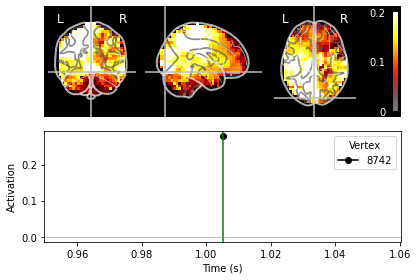

manipulation
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.106162 -0.068443 -0.036665       1.61 mm
     0.065970  1.007461  0.268459     -30.14 mm
    -0.001950 -0.301795  1.086639     -10.77 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.2 sec
Showing: t = 1.005 s, (-48.1, -51.3, 44.8) mm, [5, 10, 21] vox, 22828 vertex


KeyboardInterrupt: 

In [31]:
# Plot 1 stc
for s in all_stc:
        print('{}'.format(s))
        brain = all_stc[s].copy().crop(tmin=0,tmax=2).mean().plot(subjects_dir=subs_dir,initial_time = 1.2,
                                     clim={'kind': 'value', 'lims': [0,0.1,0.2]},#time_viewer=True,
                                            mode = 'glass_brain',src = src)

In [32]:
interaction = all_stc['manipulation/mel2'] - all_stc['manipulation/mel1'] - all_stc['maintenance/mel2'] + all_stc['maintenance/mel1']
manip_mel_diff = all_stc['manipulation/mel2'] - all_stc['manipulation/mel1']
maint_mel_diff = all_stc['maintenance/mel2'] - all_stc['maintenance/mel1']

Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.106162 -0.068443 -0.036665       1.61 mm
     0.065970  1.007461  0.268459     -30.14 mm
    -0.001950 -0.301795  1.086639     -10.77 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.2 sec
Showing: t = 2.005 s, (0.3, -91.3, -18.4) mm, [13, 5, 8] vox, 8742 vertex


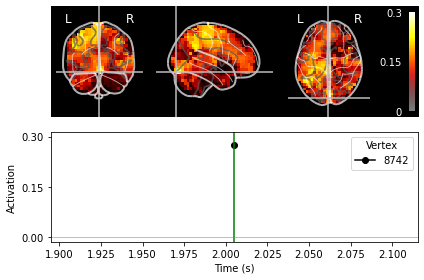

Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.106162 -0.068443 -0.036665       1.61 mm
     0.065970  1.007461  0.268459     -30.14 mm
    -0.001950 -0.301795  1.086639     -10.77 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.2 sec
Showing: t = 2.005 s, (-38.6, -31.5, 56.5) mm, [7, 13, 24] vox, 26136 vertex


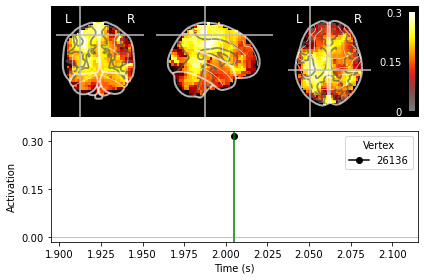

Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.106162 -0.068443 -0.036665       1.61 mm
     0.065970  1.007461  0.268459     -30.14 mm
    -0.001950 -0.301795  1.086639     -10.77 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.2 sec
Showing: t = 2.005 s, (-31.5, -52.6, 57.1) mm, [8, 9, 23] vox, 24948 vertex


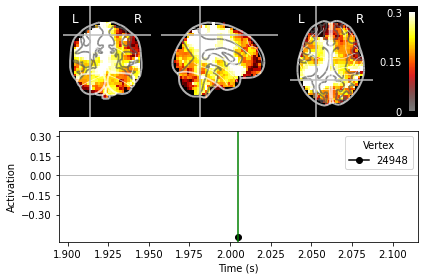

Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.106162 -0.068443 -0.036665       1.61 mm
     0.065970  1.007461  0.268459     -30.14 mm
    -0.001950 -0.301795  1.086639     -10.77 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.2 sec
Showing: t = 2.005 s, (22.2, 61.5, 0.6) mm, [19, 32, 19] vox, 21334 vertex


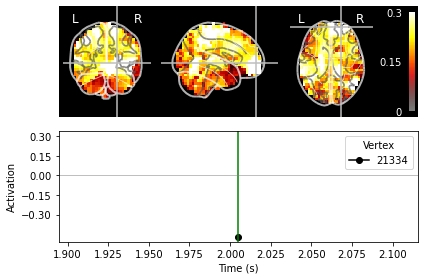

Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.106162 -0.068443 -0.036665       1.61 mm
     0.065970  1.007461  0.268459     -30.14 mm
    -0.001950 -0.301795  1.086639     -10.77 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.2 sec
Showing: t = 2.005 s, (22.4, 60.1, -4.9) mm, [19, 32, 18] vox, 20261 vertex


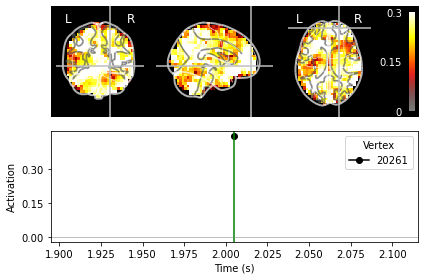

In [36]:
tmin, tmax = 1.5,2.5
lims=[0,0.15,0.3]
brain = all_stc['maintenance'].copy().crop(tmin,tmax).mean().plot(subjects_dir=subs_dir,
                                                                           initial_time = 1.2,
                             clim={'kind': 'value', 'lims': lims},#time_viewer=True,
                                    mode = 'glass_brain',src = src)
brain = all_stc['manipulation'].copy().crop(tmin,tmax).mean().plot(subjects_dir=subs_dir,initial_time = 1.2,
                             clim={'kind': 'value', 'lims': lims},#time_viewer=True,
                                    mode = 'glass_brain',src = src)
brain = manip_mel_diff.copy().crop(tmin,tmax).mean().plot(subjects_dir=subs_dir,initial_time = 1.2,
                             clim={'kind': 'value', 'lims': lims},#time_viewer=True,
                                    mode = 'glass_brain',src = src)
brain = maint_mel_diff.copy().crop(tmin,tmax).mean().plot(subjects_dir=subs_dir,initial_time = 1.2,
                             clim={'kind': 'value', 'lims': lims},#time_viewer=True,
                                    mode = 'glass_brain',src = src)
brain = interaction.copy().crop(tmin,tmax).mean().plot(subjects_dir=subs_dir,initial_time = 1.2,
                             clim={'kind': 'value', 'lims': lims},#time_viewer=True,
                                    mode = 'glass_brain',src = src)

Fixing initial time: 1.2 sec
Showing: t = 2.005 s, (-5.3, -54.4, -22.1) mm, [13, 5, 8] vox, 8742 vertex


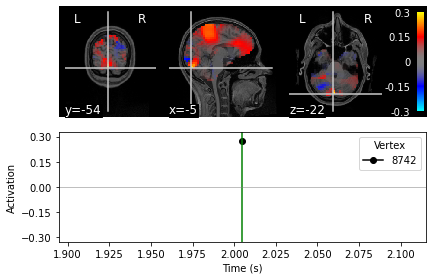

Fixing initial time: 1.2 sec
Showing: t = 2.005 s, (-35.3, -14.4, 57.9) mm, [7, 13, 24] vox, 26136 vertex


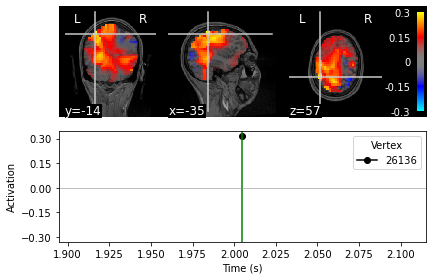

Fixing initial time: 1.2 sec
Showing: t = 2.005 s, (-30.3, -34.4, 52.9) mm, [8, 9, 23] vox, 24948 vertex


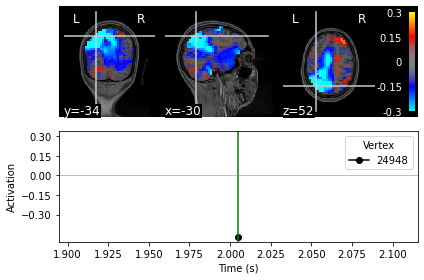

Fixing initial time: 1.2 sec
Showing: t = 2.005 s, (24.7, 80.6, 32.9) mm, [19, 32, 19] vox, 21334 vertex


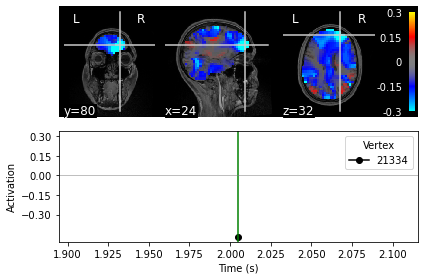

Fixing initial time: 1.2 sec
Showing: t = 2.005 s, (24.7, 80.6, 27.9) mm, [19, 32, 18] vox, 20261 vertex


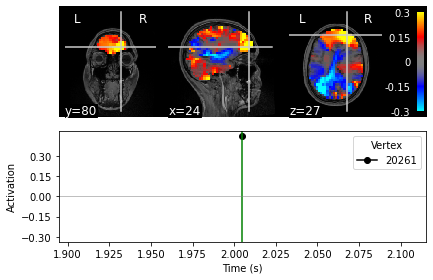

In [35]:
tmin, tmax = 1.5,2.5
lims=[0,0.15,0.3]
brain = all_stc['maintenance'].copy().crop(tmin,tmax).mean().plot(subjects_dir=subs_dir,
                                                                           initial_time = 1.2,
                             clim={'kind': 'value', 'pos_lims': lims},#time_viewer=True,
                                    mode = 'stat_map',src = src)
brain = all_stc['manipulation'].copy().crop(tmin,tmax).mean().plot(subjects_dir=subs_dir,initial_time = 1.2,
                             clim={'kind': 'value', 'pos_lims': lims},#time_viewer=True,
                                    mode = 'stat_map',src = src)
brain = manip_mel_diff.copy().crop(tmin,tmax).mean().plot(subjects_dir=subs_dir,initial_time = 1.2,
                             clim={'kind': 'value', 'pos_lims':lims},#time_viewer=True,
                                    mode = 'stat_map',src = src)
brain = maint_mel_diff.copy().crop(tmin,tmax).mean().plot(subjects_dir=subs_dir,initial_time = 1.2,
                             clim={'kind': 'value', 'pos_lims': lims},#time_viewer=True,
                                    mode = 'stat_map',src = src)
brain = interaction.copy().crop(tmin,tmax).mean().plot(subjects_dir=subs_dir,initial_time = 1.2,
                             clim={'kind': 'value', 'pos_lims': lims},#time_viewer=True,
                                    mode = 'stat_map',src = src)

maintenance 0.0
Fixing initial time: 0.0 sec
Showing: t = 0.000 s, (13.9, 46.5, -21.4) mm, [18, 26, 10] vox, 13534 vertex


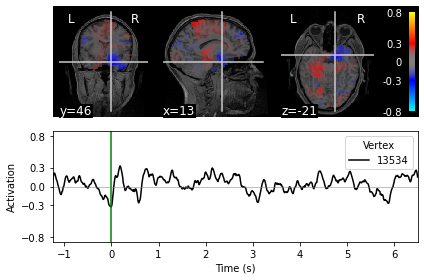

maintenance 0.1
Fixing initial time: 0.1 sec
Showing: t = 0.100 s, (18.9, -68.5, -11.4) mm, [19, 3, 12] vox, 15364 vertex


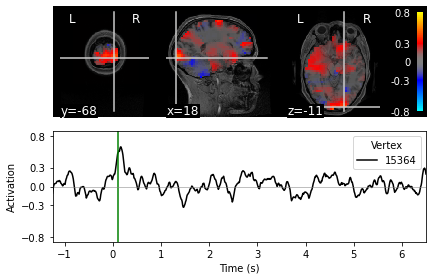

maintenance 0.2
Fixing initial time: 0.2 sec
Showing: t = 0.200 s, (-6.1, -28.5, 13.6) mm, [14, 11, 17] vox, 21962 vertex


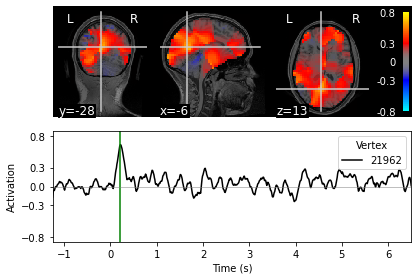

maintenance 0.30000000000000004
Fixing initial time: 0.30000000000000004 sec
Showing: t = 0.300 s, (-36.1, 6.5, 3.6) mm, [8, 18, 15] vox, 19631 vertex


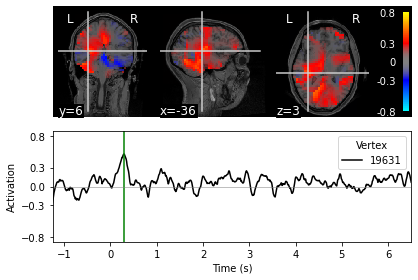

maintenance 0.4
Fixing initial time: 0.4 sec
Showing: t = 0.400 s, (3.9, -3.5, -11.4) mm, [16, 16, 12] vox, 15764 vertex


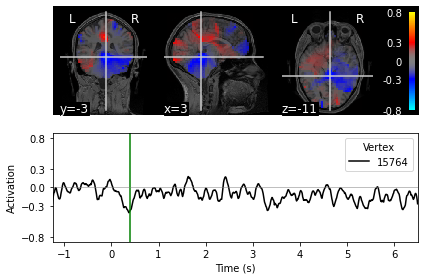

maintenance 0.5
Fixing initial time: 0.5 sec
Showing: t = 0.500 s, (43.9, -8.5, -46.4) mm, [24, 15, 5] vox, 6844 vertex


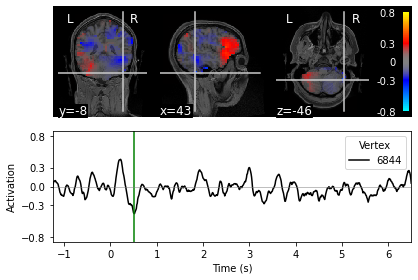

maintenance 0.6000000000000001
Fixing initial time: 0.6000000000000001 sec
Showing: t = 0.600 s, (33.9, -3.5, 63.6) mm, [22, 16, 27] vox, 34835 vertex


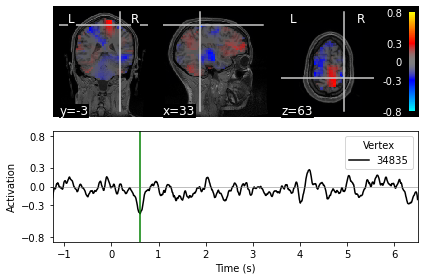

maintenance 0.7000000000000001
Fixing initial time: 0.7000000000000001 sec
Showing: t = 0.700 s, (-51.1, 21.5, 18.6) mm, [5, 21, 18] vox, 23534 vertex


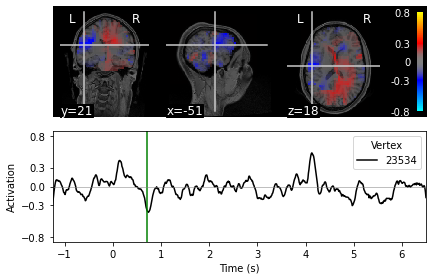

maintenance 0.8
Fixing initial time: 0.8 sec
Showing: t = 0.800 s, (-46.1, 51.5, 48.6) mm, [6, 27, 24] vox, 31347 vertex


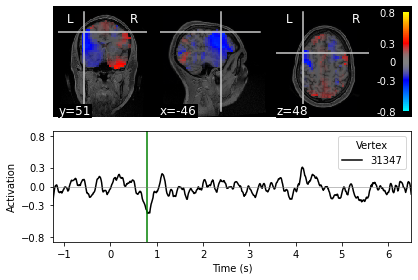

maintenance 0.9
Fixing initial time: 0.9 sec
Showing: t = 0.900 s, (3.9, -3.5, 28.6) mm, [16, 16, 20] vox, 25932 vertex


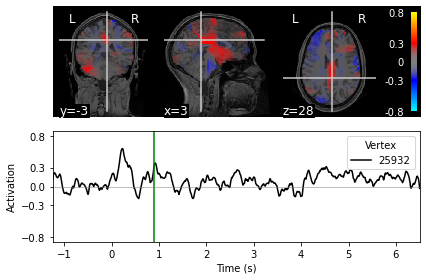

maintenance 1.0
Fixing initial time: 1.0 sec
Showing: t = 1.000 s, (28.9, 61.5, 18.6) mm, [21, 29, 18] vox, 23798 vertex


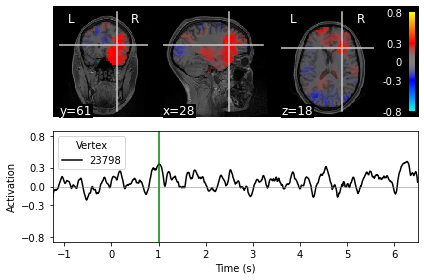

maintenance 1.1
Fixing initial time: 1.1 sec
Showing: t = 1.100 s, (-11.1, -53.5, -36.4) mm, [13, 6, 7] vox, 9096 vertex


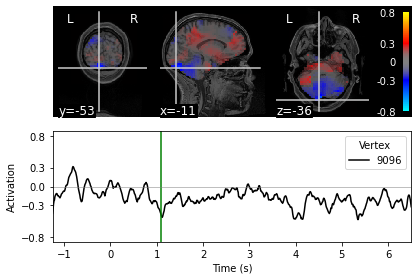

maintenance 1.2000000000000002
Fixing initial time: 1.2000000000000002 sec
Showing: t = 1.200 s, (13.9, 101.5, 33.6) mm, [18, 37, 21] vox, 27856 vertex


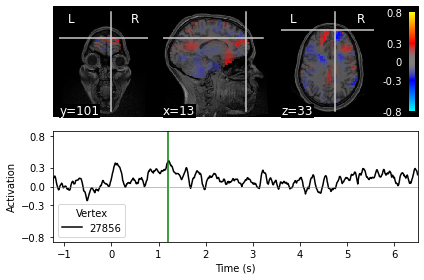

maintenance 1.3
Fixing initial time: 1.3 sec
Showing: t = 1.300 s, (23.9, 41.5, 63.6) mm, [20, 25, 27] vox, 35112 vertex


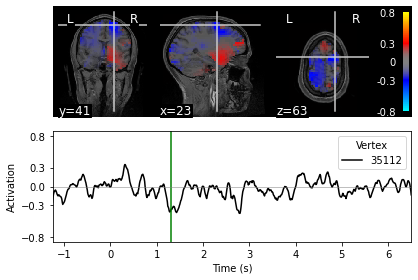

maintenance 1.4000000000000001
Fixing initial time: 1.4000000000000001 sec
Showing: t = 1.400 s, (18.9, 56.5, 43.6) mm, [19, 28, 23] vox, 30120 vertex


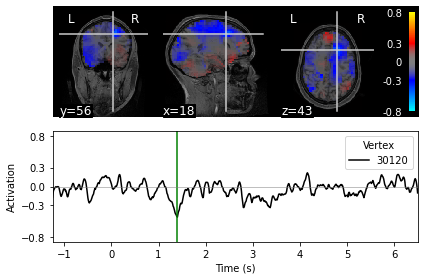

maintenance 1.5
Fixing initial time: 1.5 sec
Showing: t = 1.500 s, (23.9, 6.5, -31.4) mm, [20, 18, 8] vox, 10746 vertex


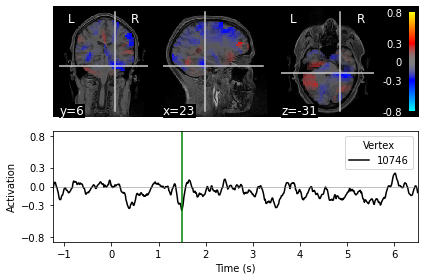

maintenance 1.6
Fixing initial time: 1.6 sec
Showing: t = 1.600 s, (-16.1, -63.5, -31.4) mm, [12, 4, 8] vox, 10304 vertex


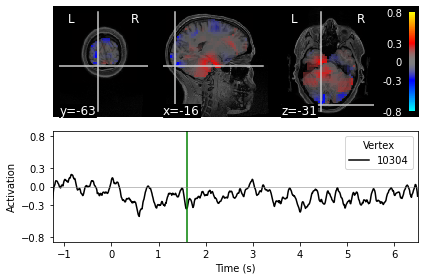

maintenance 1.7000000000000002
Fixing initial time: 1.7000000000000002 sec
Showing: t = 1.700 s, (18.9, -3.5, 68.6) mm, [19, 16, 28] vox, 36103 vertex


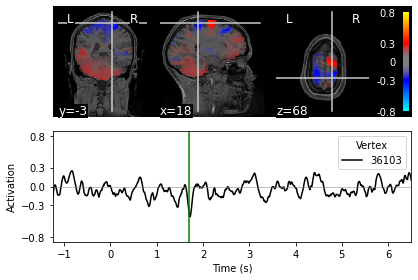

maintenance 1.8
Fixing initial time: 1.8 sec
Showing: t = 1.800 s, (13.9, -8.5, 73.6) mm, [18, 15, 29] vox, 37342 vertex


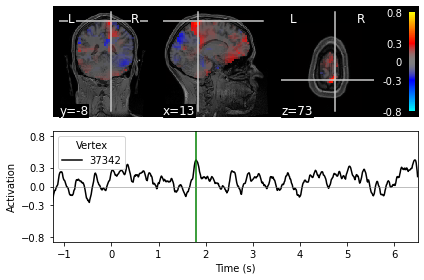

maintenance 1.9000000000000001
Fixing initial time: 1.9000000000000001 sec
Showing: t = 1.900 s, (-26.1, -58.5, 18.6) mm, [10, 5, 18] vox, 23043 vertex


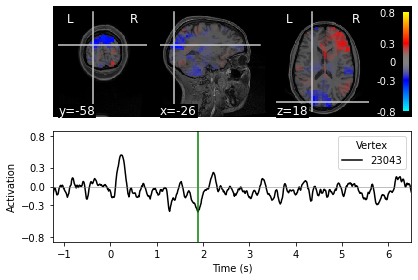

maintenance 2.0
Fixing initial time: 2.0 sec
Showing: t = 2.000 s, (-1.1, -23.5, 43.6) mm, [15, 12, 23] vox, 29620 vertex


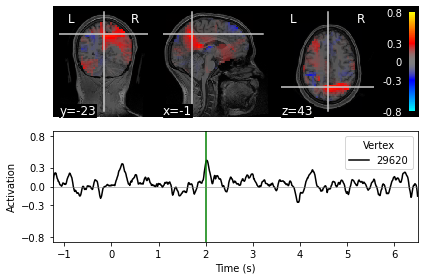

maintenance 2.1
Fixing initial time: 2.1 sec
Showing: t = 2.100 s, (-16.1, -48.5, -36.4) mm, [12, 7, 7] vox, 9126 vertex


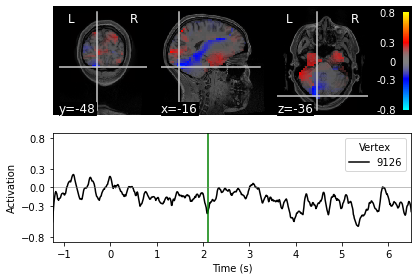

maintenance 2.2
Fixing initial time: 2.2 sec
Showing: t = 2.200 s, (-56.1, -23.5, -6.4) mm, [4, 12, 13] vox, 16899 vertex


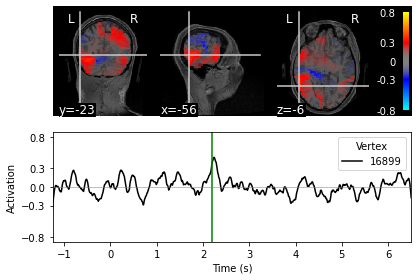

maintenance 2.3000000000000003
Fixing initial time: 2.3000000000000003 sec
Showing: t = 2.300 s, (-41.1, -23.5, 48.6) mm, [7, 12, 24] vox, 30883 vertex


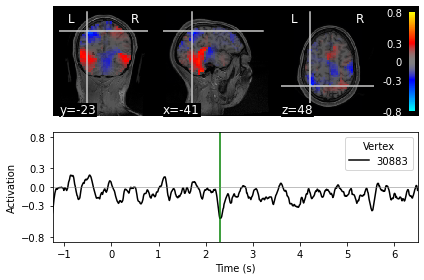

maintenance 2.4000000000000004
Fixing initial time: 2.4000000000000004 sec
Showing: t = 2.400 s, (-36.1, 1.5, -46.4) mm, [8, 17, 5] vox, 6890 vertex


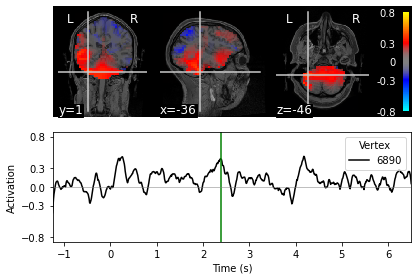

maintenance 2.5
Fixing initial time: 2.5 sec
Showing: t = 2.500 s, (-41.1, -33.5, -16.4) mm, [7, 10, 11] vox, 14298 vertex


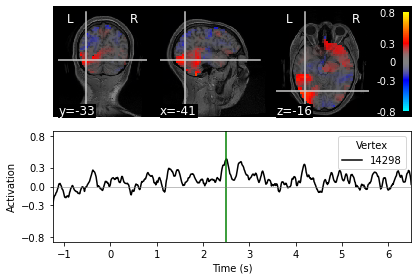

maintenance 2.6
Fixing initial time: 2.6 sec
Showing: t = 2.600 s, (-26.1, -68.5, 3.6) mm, [10, 3, 15] vox, 19168 vertex


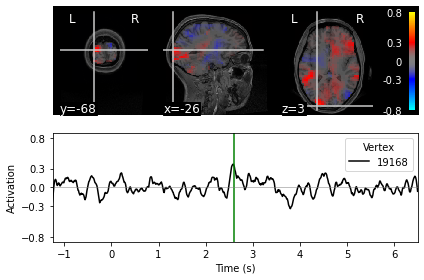

maintenance 2.7
Fixing initial time: 2.7 sec
Showing: t = 2.700 s, (-11.1, -63.5, -11.4) mm, [13, 4, 12] vox, 15389 vertex


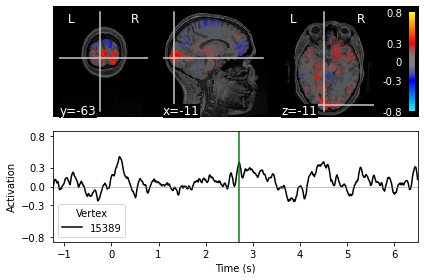

maintenance 2.8000000000000003
Fixing initial time: 2.8000000000000003 sec
Showing: t = 2.800 s, (33.9, 16.5, 38.6) mm, [22, 20, 22] vox, 28604 vertex


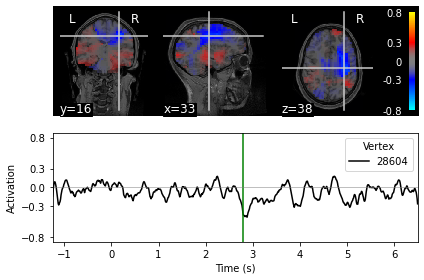

maintenance 2.9000000000000004
Fixing initial time: 2.9000000000000004 sec
Showing: t = 2.900 s, (38.9, 41.5, 48.6) mm, [23, 25, 24] vox, 31302 vertex


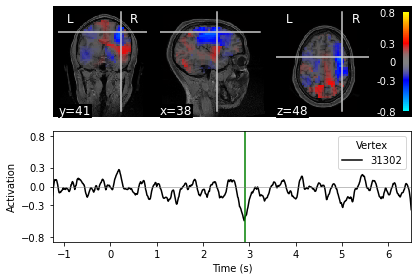

maintenance 3.0
Fixing initial time: 3.0 sec
Showing: t = 3.000 s, (-46.1, -23.5, 43.6) mm, [6, 12, 23] vox, 29611 vertex


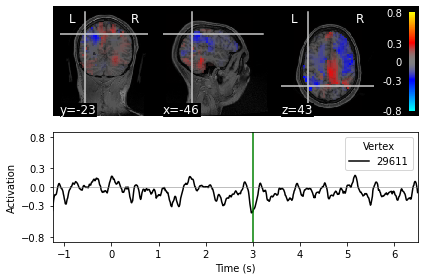

maintenance 3.1
Fixing initial time: 3.1 sec
Showing: t = 3.100 s, (-16.1, 11.5, 33.6) mm, [12, 19, 21] vox, 27292 vertex


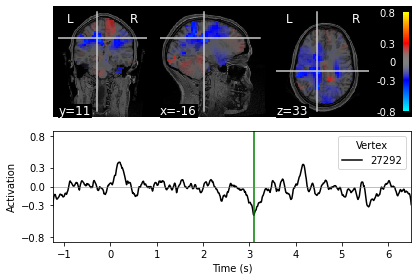

maintenance 3.2
Fixing initial time: 3.2 sec
Showing: t = 3.200 s, (-56.1, 6.5, 18.6) mm, [4, 18, 18] vox, 23440 vertex


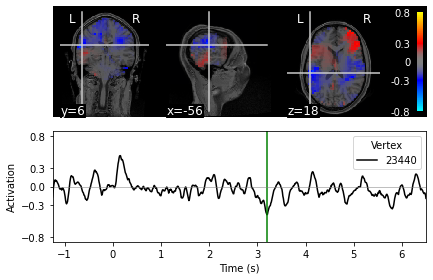

maintenance 3.3000000000000003
Fixing initial time: 3.3000000000000003 sec
Showing: t = 3.300 s, (18.9, 81.5, 48.6) mm, [19, 33, 24] vox, 31546 vertex


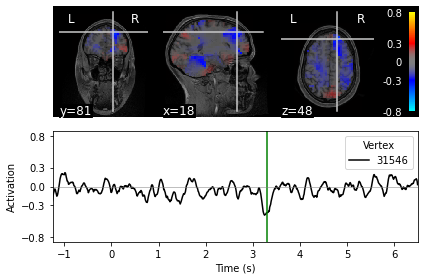

maintenance 3.4000000000000004
Fixing initial time: 3.4000000000000004 sec
Showing: t = 3.400 s, (63.9, 1.5, -16.4) mm, [28, 17, 11] vox, 14536 vertex


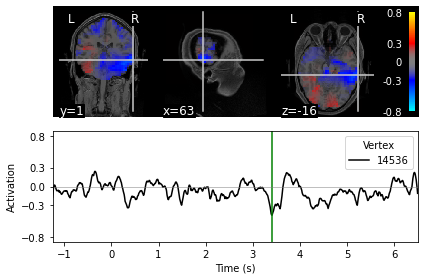

maintenance 3.5
Fixing initial time: 3.5 sec
Showing: t = 3.500 s, (63.9, 6.5, -21.4) mm, [28, 18, 10] vox, 13296 vertex


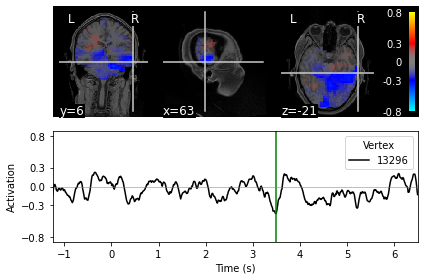

maintenance 3.6
Fixing initial time: 3.6 sec
Showing: t = 3.600 s, (-61.1, -13.5, 13.6) mm, [3, 14, 17] vox, 22044 vertex


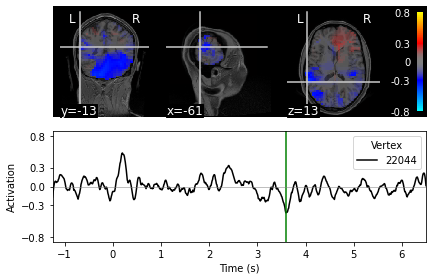

maintenance 3.7
Fixing initial time: 3.7 sec
Showing: t = 3.700 s, (-61.1, -8.5, 23.6) mm, [3, 15, 19] vox, 24617 vertex


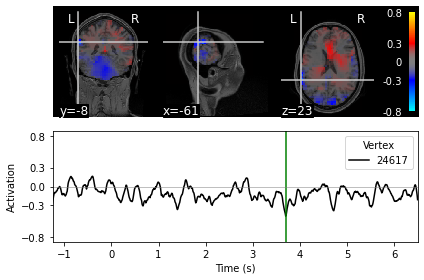

maintenance 3.8000000000000003
Fixing initial time: 3.8000000000000003 sec
Showing: t = 3.800 s, (13.9, -33.5, 58.6) mm, [18, 10, 26] vox, 33374 vertex


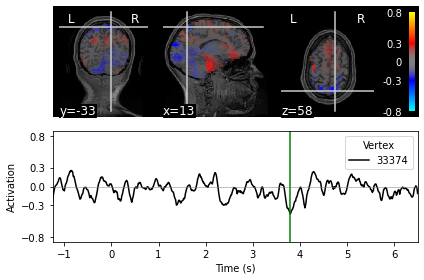

maintenance 3.9000000000000004
Fixing initial time: 3.9000000000000004 sec
Showing: t = 3.900 s, (-36.1, -23.5, 38.6) mm, [8, 12, 22] vox, 28342 vertex


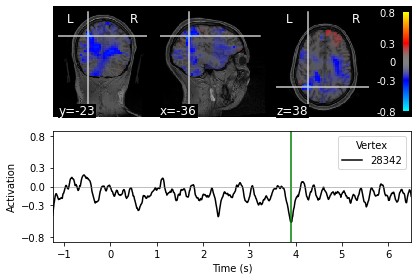

maintenance 4.0
Fixing initial time: 4.0 sec
Showing: t = 4.000 s, (-11.1, -53.5, -36.4) mm, [13, 6, 7] vox, 9096 vertex


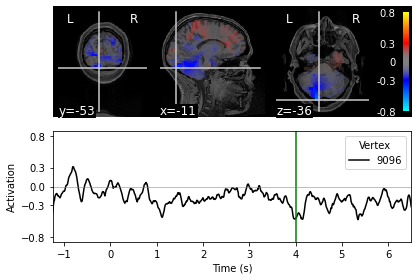

maintenance 4.1000000000000005
Fixing initial time: 4.1000000000000005 sec
Showing: t = 4.100 s, (-61.1, 21.5, 18.6) mm, [3, 21, 18] vox, 23532 vertex


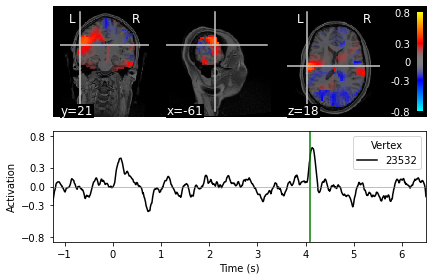

maintenance 4.2
Fixing initial time: 4.2 sec
Showing: t = 4.200 s, (-26.1, -13.5, -26.4) mm, [10, 14, 9] vox, 11883 vertex


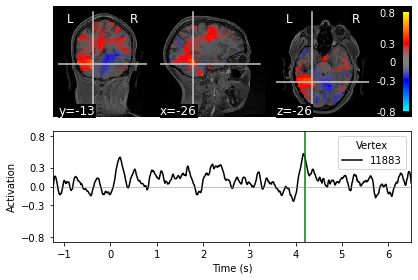

maintenance 4.3
Fixing initial time: 4.3 sec
Showing: t = 4.300 s, (48.9, 1.5, -26.4) mm, [25, 17, 9] vox, 11991 vertex


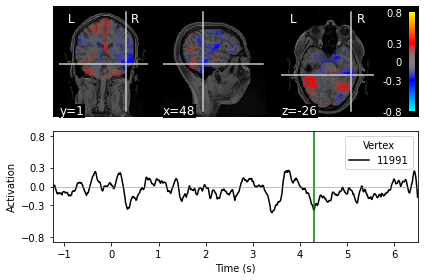

maintenance 4.4
Fixing initial time: 4.4 sec
Showing: t = 4.400 s, (3.9, -3.5, 13.6) mm, [16, 16, 17] vox, 22119 vertex


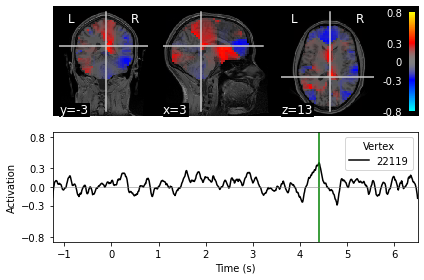

maintenance 4.5
Fixing initial time: 4.5 sec
Showing: t = 4.500 s, (-6.1, -63.5, 3.6) mm, [14, 4, 15] vox, 19203 vertex


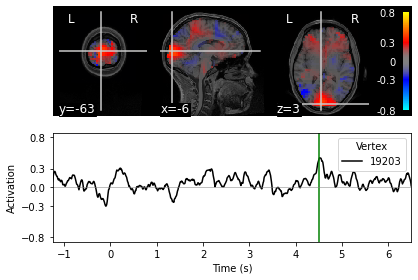

maintenance 4.6000000000000005
Fixing initial time: 4.6000000000000005 sec
Showing: t = 4.600 s, (43.9, -3.5, 13.6) mm, [24, 16, 17] vox, 22127 vertex


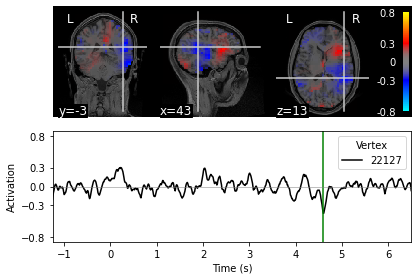

maintenance 4.7
Fixing initial time: 4.7 sec
Showing: t = 4.700 s, (-16.1, -53.5, -36.4) mm, [12, 6, 7] vox, 9095 vertex


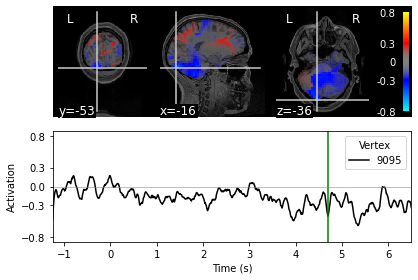

maintenance 4.800000000000001
Fixing initial time: 4.800000000000001 sec
Showing: t = 4.800 s, (-21.1, 56.5, -21.4) mm, [11, 28, 10] vox, 13589 vertex


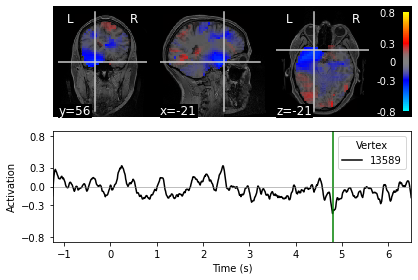

maintenance 4.9
Fixing initial time: 4.9 sec
Showing: t = 4.900 s, (28.9, -38.5, -31.4) mm, [21, 9, 8] vox, 10468 vertex


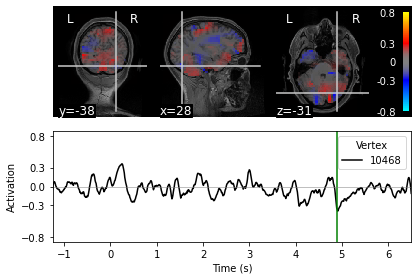

maintenance 5.0
Fixing initial time: 5.0 sec
Showing: t = 5.000 s, (43.9, 31.5, 53.6) mm, [24, 23, 25] vox, 32512 vertex


KeyboardInterrupt: 

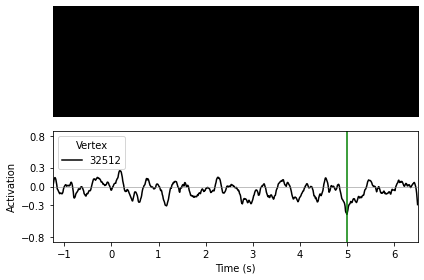

In [84]:
# Plot 1 stc
for s in all_stc:
        plot_times = np.arange(0,6,0.1)     
        for pt in plot_times:
            print('{} {}'.format(s,pt))
            brain = all_stc[s].plot(subjects_dir=subs_dir,initial_time = pt,clim={'kind': 'value', 'pos_lims': [0,0.3,.8]},#time_viewer=True,
                                    mode = 'stat_map',src = src)

maintenance 0.0
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.0 sec
Showing: t = 0.000 s, (-51.2, -47.9, -44.7) mm, [5, 17, 6] vox, 8158 vertex


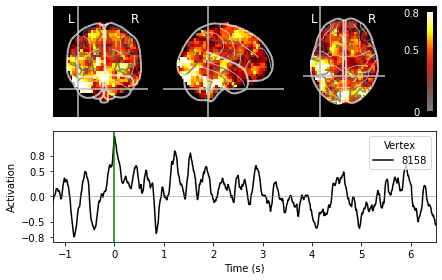

maintenance 0.1
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.1 sec
Showing: t = 0.100 s, (49.9, 2.6, 24.9) mm, [25, 23, 20] vox, 26158 vertex


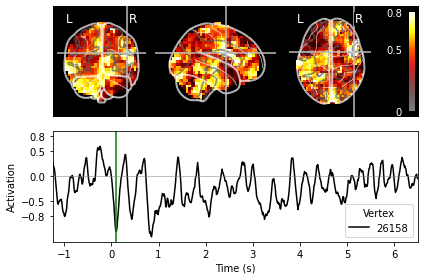

maintenance 0.2
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.2 sec
Showing: t = 0.200 s, (-29.3, -87.6, -13.1) mm, [9, 7, 10] vox, 12936 vertex


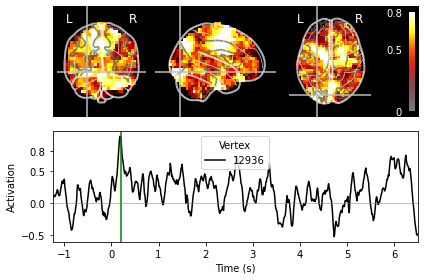

maintenance 0.30000000000000004
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.30000000000000004 sec
Showing: t = 0.300 s, (16.7, 3.1, 67.8) mm, [19, 21, 28] vox, 36258 vertex


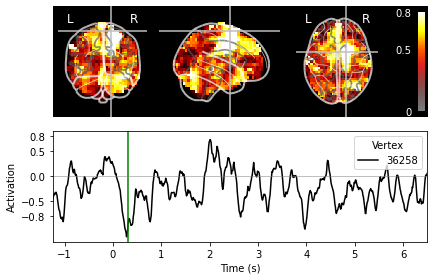

maintenance 0.4
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.4 sec
Showing: t = 0.400 s, (4.6, -68.6, 55.6) mm, [16, 7, 23] vox, 29466 vertex


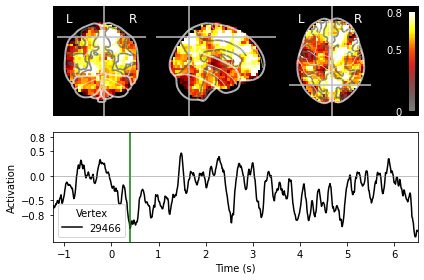

maintenance 0.5
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.5 sec
Showing: t = 0.500 s, (-10.9, -64.1, 37.5) mm, [13, 9, 20] vox, 25712 vertex


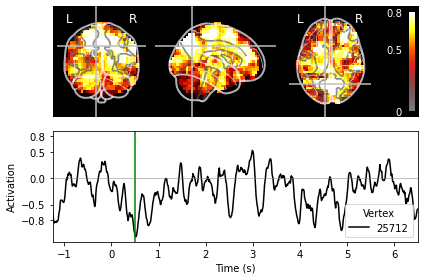

maintenance 0.6000000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.6000000000000001 sec
Showing: t = 0.600 s, (29.2, -36.0, 65.8) mm, [21, 13, 26] vox, 33470 vertex


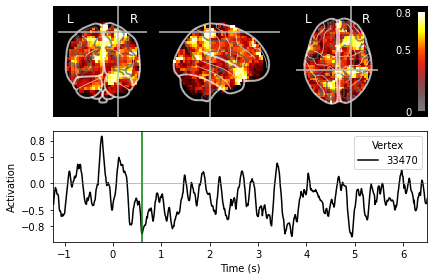

maintenance 0.7000000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.7000000000000001 sec
Showing: t = 0.700 s, (-59.2, -43.0, 31.2) mm, [4, 14, 20] vox, 25858 vertex


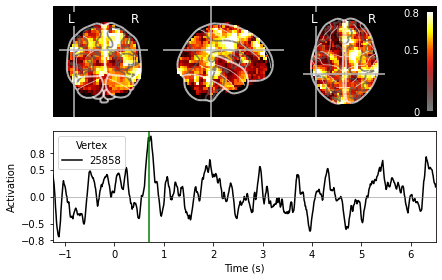

maintenance 0.8
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.8 sec
Showing: t = 0.800 s, (-0.9, -35.6, 15.0) mm, [15, 16, 17] vox, 22118 vertex


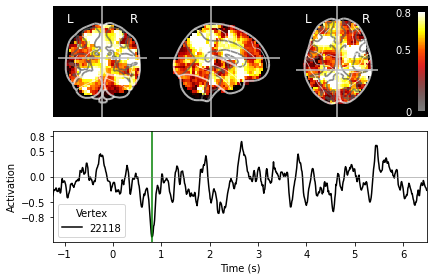

maintenance 0.9
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 0.9 sec
Showing: t = 0.900 s, (44.5, 13.5, 11.3) mm, [24, 26, 18] vox, 23708 vertex


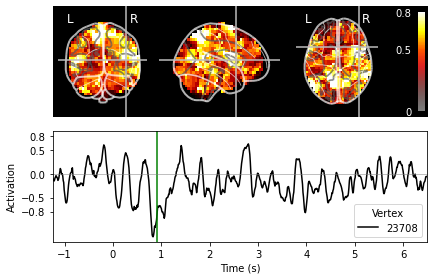

maintenance 1.0
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.0 sec
Showing: t = 1.000 s, (32.7, 56.4, -9.6) mm, [22, 36, 16] vox, 21474 vertex


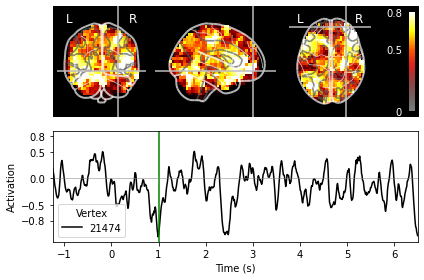

maintenance 1.1
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.1 sec
Showing: t = 1.100 s, (39.8, -32.4, 59.9) mm, [23, 14, 25] vox, 32232 vertex


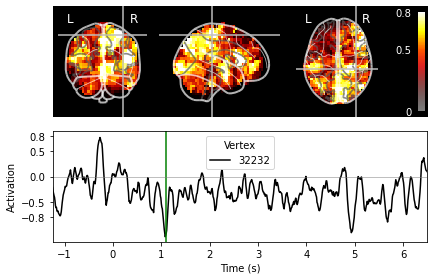

maintenance 1.2000000000000002
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.2000000000000002 sec
Showing: t = 1.200 s, (42.3, -47.2, 2.5) mm, [23, 14, 14] vox, 18251 vertex


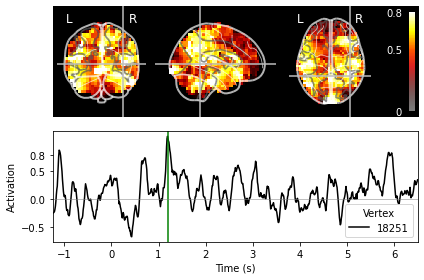

maintenance 1.3
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.3 sec
Showing: t = 1.300 s, (-36.3, -41.9, -23.4) mm, [8, 17, 10] vox, 13245 vertex


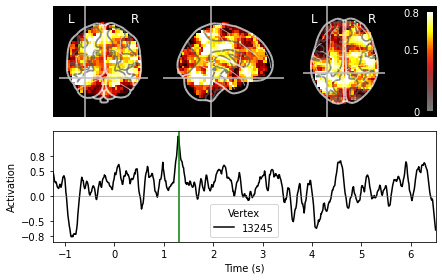

maintenance 1.4000000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.4000000000000001 sec
Showing: t = 1.400 s, (26.6, 25.1, 57.8) mm, [21, 26, 27] vox, 35144 vertex


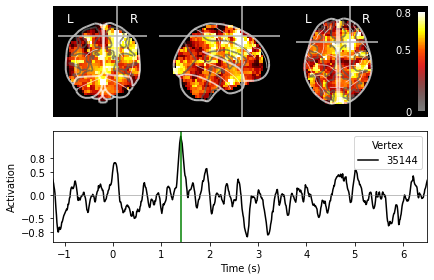

maintenance 1.5
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.5 sec
Showing: t = 1.500 s, (-19.5, -86.4, 9.0) mm, [11, 6, 14] vox, 17991 vertex


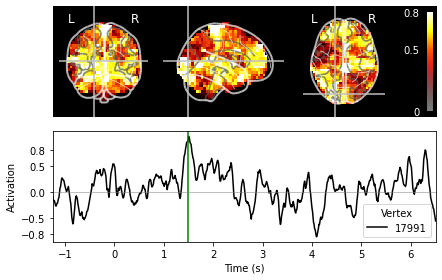

maintenance 1.6
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.6 sec
Showing: t = 1.600 s, (51.1, -29.5, 32.0) mm, [25, 16, 20] vox, 25941 vertex


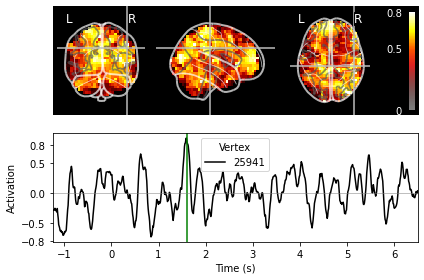

maintenance 1.7000000000000002
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.7000000000000002 sec
Showing: t = 1.700 s, (13.6, -104.4, -8.0) mm, [17, 3, 10] vox, 12820 vertex


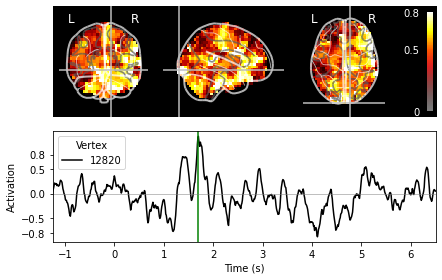

maintenance 1.8
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.8 sec
Showing: t = 1.800 s, (13.7, -101.1, -14.2) mm, [17, 4, 9] vox, 11580 vertex


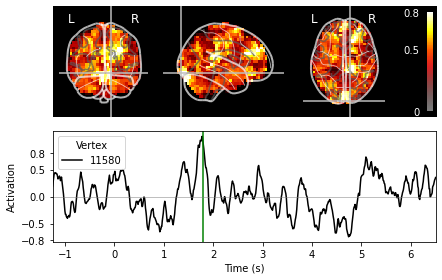

maintenance 1.9000000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 1.9000000000000001 sec
Showing: t = 1.900 s, (66.2, -10.5, 28.4) mm, [28, 20, 20] vox, 26068 vertex


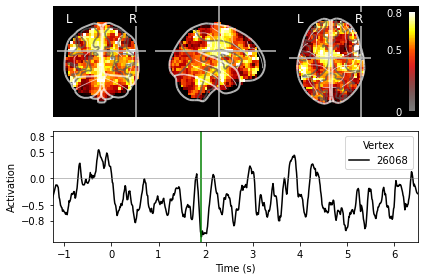

maintenance 2.0
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 2.0 sec
Showing: t = 2.000 s, (60.2, 4.4, 30.4) mm, [27, 23, 21] vox, 27431 vertex


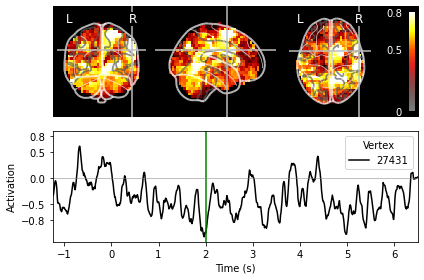

maintenance 2.1
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 2.1 sec
Showing: t = 2.100 s, (50.5, -33.3, 54.9) mm, [25, 14, 24] vox, 30963 vertex


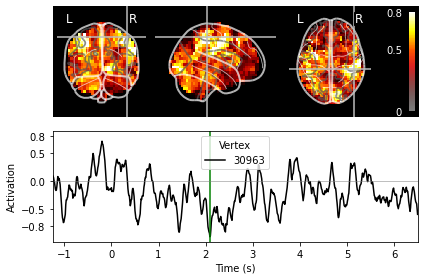

maintenance 2.2
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 2.2 sec
Showing: t = 2.200 s, (-63.7, -40.7, 3.0) mm, [3, 16, 15] vox, 19564 vertex


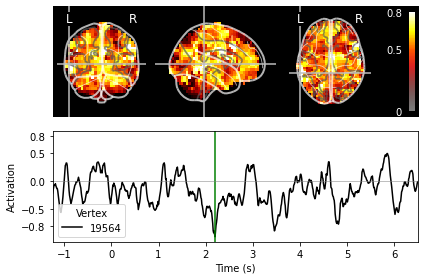

maintenance 2.3000000000000003
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 2.3000000000000003 sec
Showing: t = 2.300 s, (7.5, 19.9, 3.1) mm, [17, 28, 17] vox, 22492 vertex


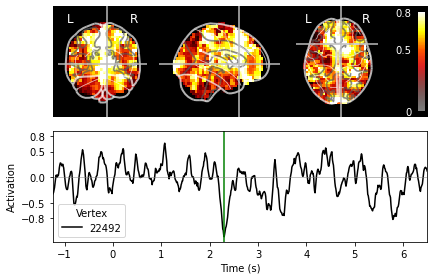

maintenance 2.4000000000000004
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 2.4000000000000004 sec
Showing: t = 2.400 s, (49.0, 43.2, -6.1) mm, [25, 33, 16] vox, 21384 vertex


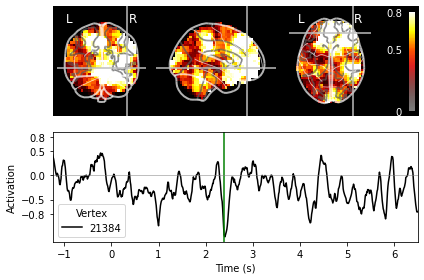

maintenance 2.5
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 2.5 sec
Showing: t = 2.500 s, (-10.8, -75.2, 51.0) mm, [13, 6, 22] vox, 28161 vertex


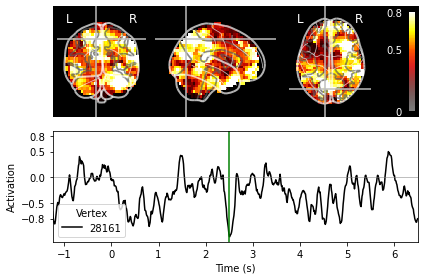

maintenance 2.6
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 2.6 sec
Showing: t = 2.600 s, (11.2, 4.2, 72.9) mm, [18, 21, 29] vox, 37528 vertex


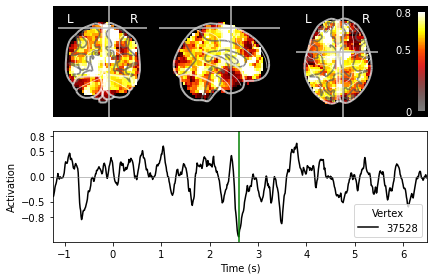

maintenance 2.7
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 2.7 sec
Showing: t = 2.700 s, (-58.3, -48.4, 10.3) mm, [4, 14, 16] vox, 20774 vertex


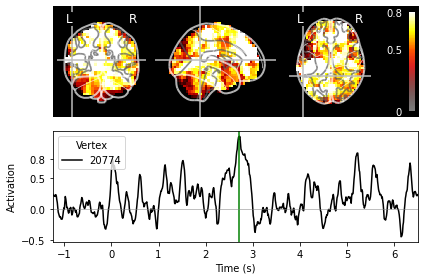

maintenance 2.8000000000000003
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 2.8000000000000003 sec
Showing: t = 2.800 s, (-64.3, -33.4, 12.4) mm, [3, 17, 17] vox, 22137 vertex


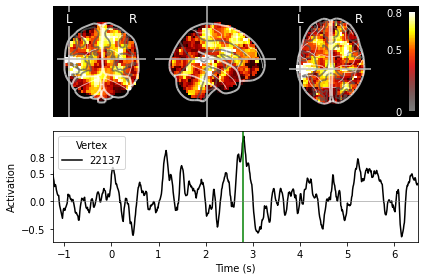

maintenance 2.9000000000000004
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 2.9000000000000004 sec
Showing: t = 2.900 s, (-48.2, -59.6, 40.7) mm, [6, 10, 21] vox, 27007 vertex


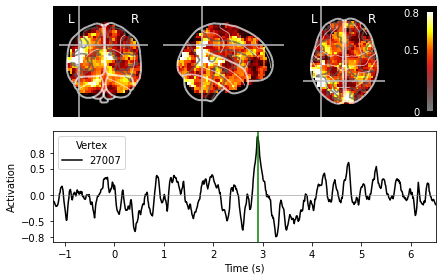

maintenance 3.0
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 3.0 sec
Showing: t = 3.000 s, (24.4, -35.7, 49.0) mm, [20, 14, 23] vox, 29687 vertex


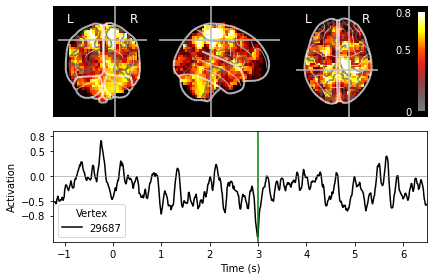

maintenance 3.1
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 3.1 sec
Showing: t = 3.100 s, (-12.2, -35.2, 36.6) mm, [13, 15, 21] vox, 27169 vertex


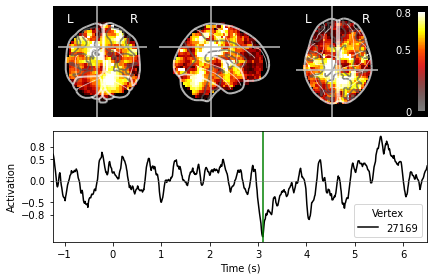

maintenance 3.2
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 3.2 sec
Showing: t = 3.200 s, (27.2, 14.5, 54.6) mm, [21, 24, 26] vox, 33811 vertex


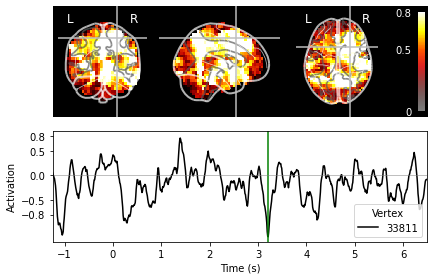

maintenance 3.3000000000000003
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 3.3000000000000003 sec
Showing: t = 3.300 s, (63.5, -25.6, -29.1) mm, [27, 20, 9] vox, 12086 vertex


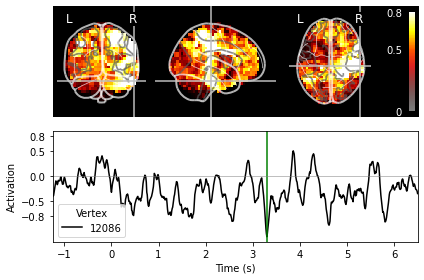

maintenance 3.4000000000000004
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 3.4000000000000004 sec
Showing: t = 3.400 s, (4.0, 5.7, -32.5) mm, [16, 27, 10] vox, 13563 vertex


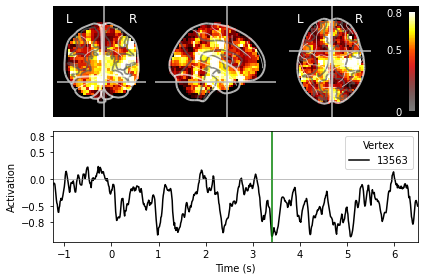

maintenance 3.5
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 3.5 sec
Showing: t = 3.500 s, (-53.1, -51.4, 16.7) mm, [5, 13, 17] vox, 22015 vertex


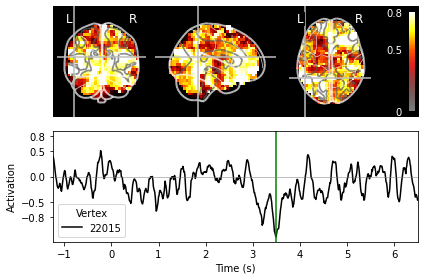

maintenance 3.6
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 3.6 sec
Showing: t = 3.600 s, (-2.2, -35.3, 53.5) mm, [15, 14, 24] vox, 30953 vertex


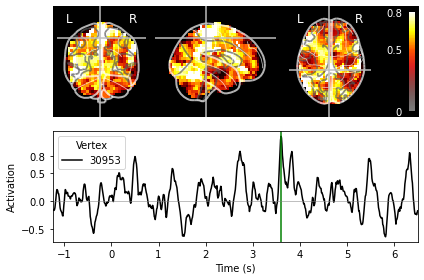

maintenance 3.7
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 3.7 sec
Showing: t = 3.700 s, (28.9, -34.7, 71.0) mm, [21, 13, 27] vox, 34741 vertex


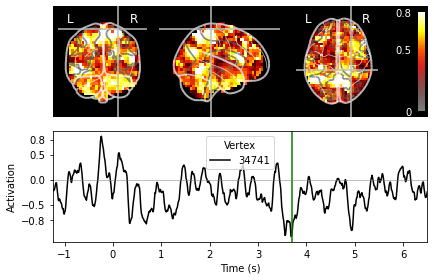

maintenance 3.8000000000000003
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 3.8000000000000003 sec
Showing: t = 3.800 s, (-66.0, -12.9, 35.4) mm, [3, 20, 22] vox, 28585 vertex


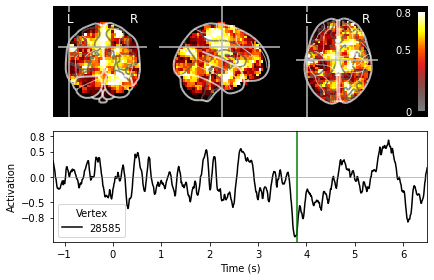

maintenance 3.9000000000000004
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 3.9000000000000004 sec
Showing: t = 3.900 s, (-26.1, -57.7, 8.0) mm, [10, 12, 15] vox, 19447 vertex


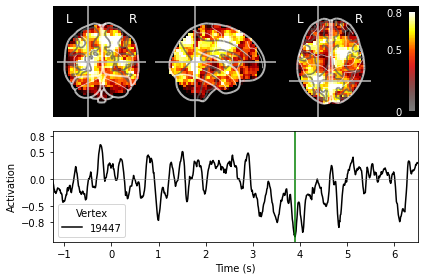

maintenance 4.0
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 4.0 sec
Showing: t = 4.000 s, (28.0, -0.6, 52.5) mm, [21, 21, 25] vox, 32447 vertex


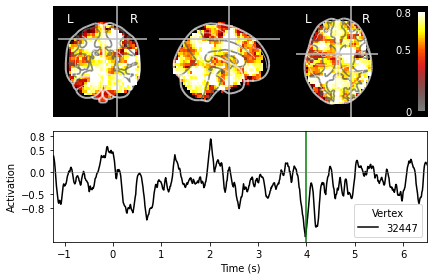

maintenance 4.1000000000000005
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 4.1000000000000005 sec
Showing: t = 4.100 s, (2.6, -98.9, -4.0) mm, [15, 4, 11] vox, 14120 vertex


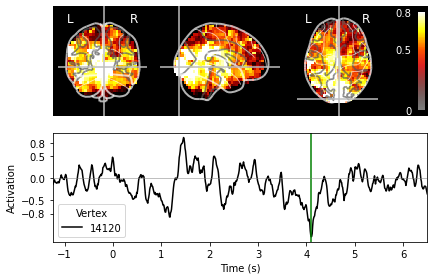

maintenance 4.2
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 4.2 sec
Showing: t = 4.200 s, (18.9, -89.9, -27.5) mm, [18, 7, 7] vox, 9132 vertex


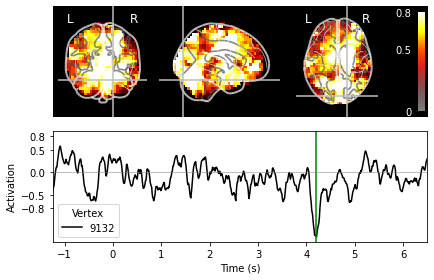

maintenance 4.3
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 4.3 sec
Showing: t = 4.300 s, (-6.1, 51.4, 50.9) mm, [15, 32, 27] vox, 35324 vertex


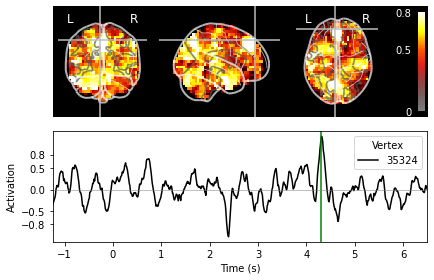

maintenance 4.4
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 4.4 sec
Showing: t = 4.400 s, (-65.7, -22.1, 37.4) mm, [3, 18, 22] vox, 28523 vertex


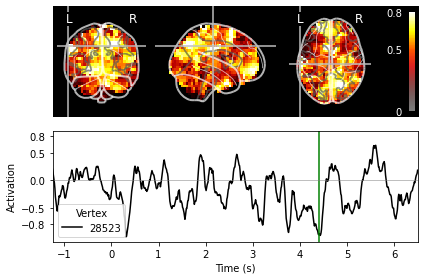

maintenance 4.5
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 4.5 sec
Showing: t = 4.500 s, (11.1, -86.3, 43.1) mm, [17, 4, 20] vox, 25561 vertex


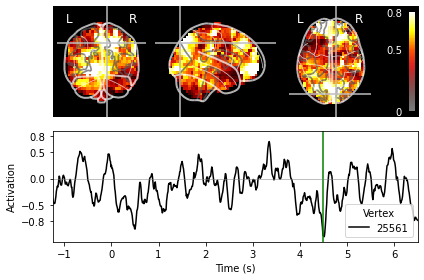

maintenance 4.6000000000000005
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 4.6000000000000005 sec
Showing: t = 4.600 s, (56.8, -35.3, 28.0) mm, [26, 15, 19] vox, 24640 vertex


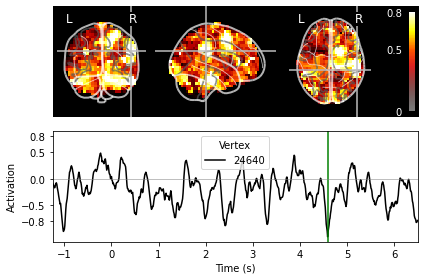

maintenance 4.7
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 4.7 sec
Showing: t = 4.700 s, (66.3, -4.0, 15.9) mm, [28, 22, 18] vox, 23588 vertex


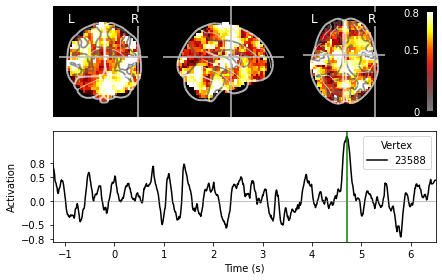

maintenance 4.800000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 4.800000000000001 sec
Showing: t = 4.800 s, (-7.4, -87.6, -34.4) mm, [13, 8, 6] vox, 7887 vertex


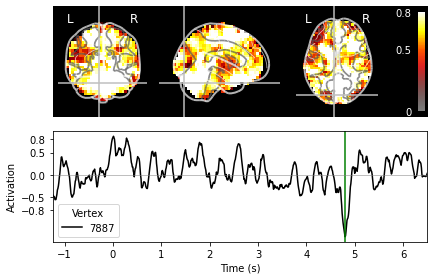

maintenance 4.9
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 4.9 sec
Showing: t = 4.900 s, (-10.3, -60.3, 14.6) mm, [13, 11, 16] vox, 20690 vertex


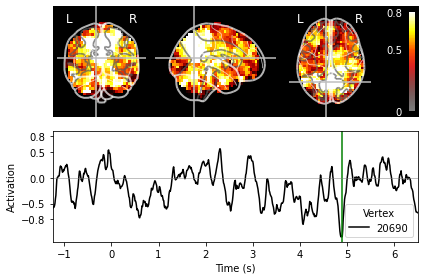

maintenance 5.0
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 5.0 sec
Showing: t = 5.000 s, (65.8, -1.3, 26.3) mm, [28, 22, 20] vox, 26130 vertex


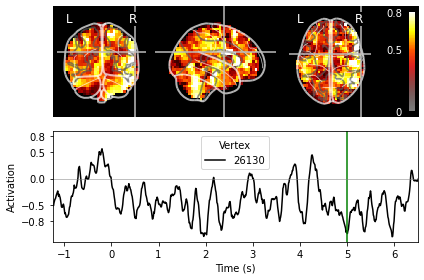

maintenance 5.1000000000000005
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 5.1000000000000005 sec
Showing: t = 5.100 s, (-1.2, 5.5, -32.7) mm, [15, 27, 10] vox, 13562 vertex


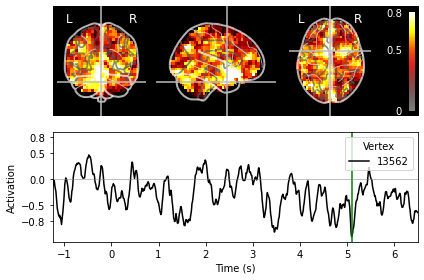

maintenance 5.2
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 5.2 sec
Showing: t = 5.200 s, (-36.3, -81.6, 29.5) mm, [8, 6, 18] vox, 23072 vertex


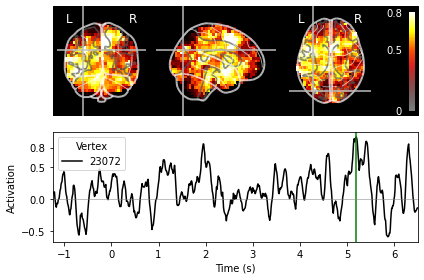

maintenance 5.300000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 5.300000000000001 sec
Showing: t = 5.300 s, (54.6, 34.2, -3.9) mm, [26, 31, 16] vox, 21323 vertex


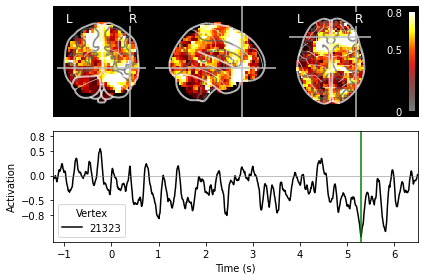

maintenance 5.4
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 5.4 sec
Showing: t = 5.400 s, (23.0, 18.7, 14.9) mm, [20, 27, 19] vox, 25006 vertex


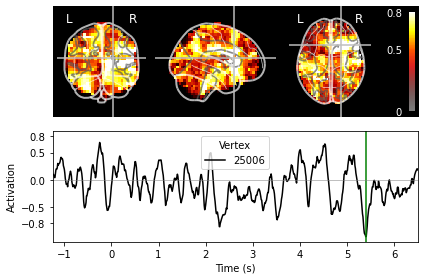

maintenance 5.5
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 5.5 sec
Showing: t = 5.500 s, (-16.3, -56.5, 30.1) mm, [12, 11, 19] vox, 24502 vertex


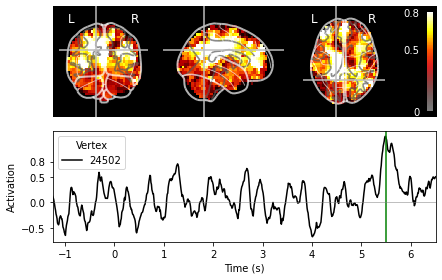

maintenance 5.6000000000000005
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 5.6000000000000005 sec
Showing: t = 5.600 s, (-12.9, -16.8, 32.5) mm, [13, 19, 21] vox, 27293 vertex


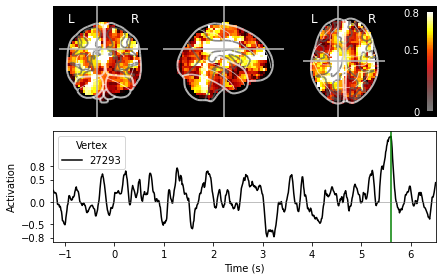

maintenance 5.7
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 5.7 sec
Showing: t = 5.700 s, (37.3, -48.8, -2.8) mm, [22, 14, 13] vox, 16979 vertex


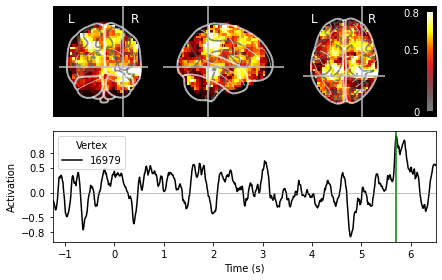

maintenance 5.800000000000001
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 5.800000000000001 sec
Showing: t = 5.800 s, (29.1, 21.3, -13.0) mm, [21, 29, 14] vox, 18714 vertex


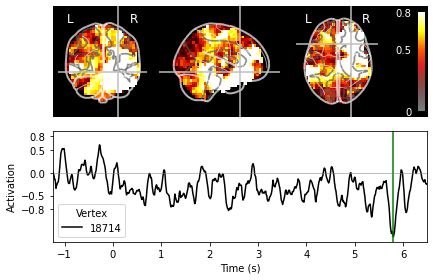

maintenance 5.9
Transforming subject RAS (non-zero origin) -> MNI Talairach
     1.054230 -0.035701 -0.046767       0.81 mm
     0.040638  0.918992  0.270333     -36.04 mm
     0.027409 -0.203541  1.042355       0.15 mm
     0.000000  0.000000  0.000000       1.00

Fixing initial time: 5.9 sec
Showing: t = 5.900 s, (24.2, -86.4, -33.6) mm, [19, 8, 6] vox, 7893 vertex


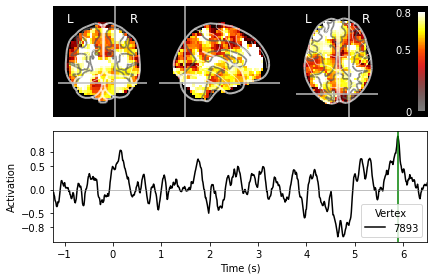

In [87]:
plot_times = np.arange(0,6,0.1)     
for pt in plot_times:
    print('{} {}'.format(s,pt))
    brain = interaction.plot(subjects_dir=subs_dir,initial_time = pt,clim={'kind': 'value', 'lims': [0,0.5,.8]},#time_viewer=True,
                            mode = 'glass_brain',src = src)

Fixing initial position: [58.0, 41.0, 33.0] mm
Showing: t = 2.005 s, (54.7, 40.6, 32.9) mm, [25, 24, 19] vox, 21108 vertex


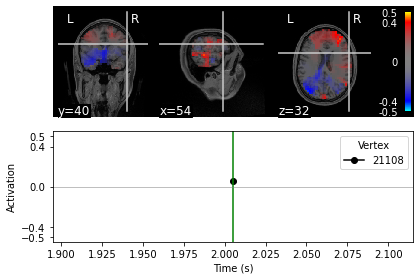

In [38]:
brain = interaction.copy().crop(1.5,2.5).mean().plot(subjects_dir=subs_dir,clim={'kind': 'value', 'pos_lims': [0,0.4,.5]},#time_viewer=True,
                        mode = 'stat_map',src = src,initial_pos=[0.058,0.041,0.033])

Fixing initial position: [-50.0, -30.0, 33.0] mm
Showing: t = -1.250 s, (-50.3, -29.4, 32.9) mm, [4, 10, 19] vox, 20681 vertex


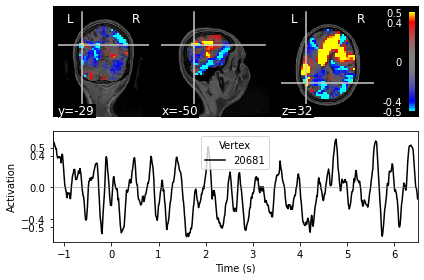

In [37]:
brain = interaction.plot(subjects_dir=subs_dir,clim={'kind': 'value', 'pos_lims': [0,0.4,.5]},#time_viewer=True,
                        mode = 'stat_map',src = src,initial_pos=[-0.05,-0.03,0.033])